In [1]:
import cv2
from build_model import download_dataset, build_labeled_images, resize, train_test_split, build_generators, build_cnn_model, print_test_data_evaluation
import matplotlib.pyplot as plt
import random
from constants import LABEL_TO_INDEX

/Users/vadimklimenko/Projects/set/dl-final/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = download_dataset()
labeled_images = build_labeled_images(path)
data, labels = resize(labeled_images)

Path to dataset files: /Users/vadimklimenko/.cache/kagglehub/datasets/anshtanwar/pets-facial-expression-dataset/versions/11
Found images:
happy: 250
sad: 250
angry: 250



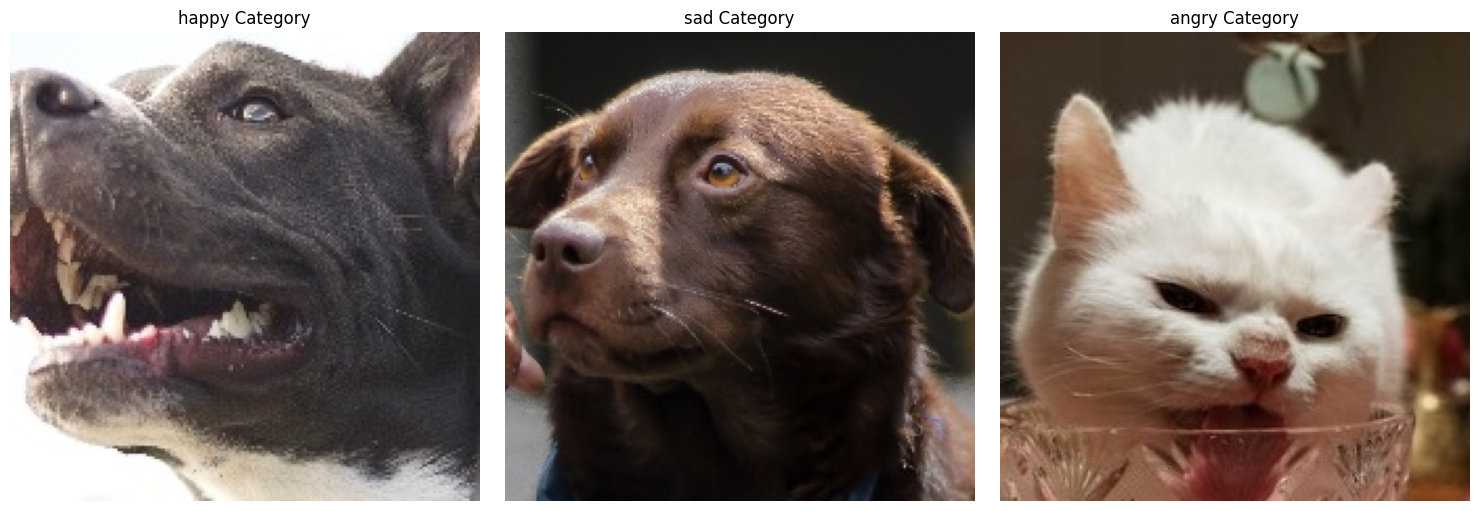

In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalcatface_extended.xml')

col = len(LABEL_TO_INDEX.keys())
plt.figure(figsize=(15, 5))

category_images = {0: labeled_images['happy'], 1: labeled_images['sad'], 2: labeled_images['angry']}
label_map = {v: k for k, v in LABEL_TO_INDEX.items()}

for i in range(col):
    random_image = random.choice(category_images[i])  
    gray_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    
    if len(faces) > 0:
        (x, y, w, h) = faces[0]  
        cropped_face = random_image[y:y+h, x:x+w]
        resized_face = cv2.resize(cropped_face, (128, 128))
    else:
        resized_face = cv2.resize(random_image, (128, 128))  

    plt.subplot(1, col, i+1)
    plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)) 
    plt.title(f"{label_map[i]} Category")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
train_generator, val_generator = build_generators(X_train, X_val, y_train, y_val, data, labels)

cnn_model = build_cnn_model(train_generator, val_generator)
print(cnn_model)
model, history = cnn_model

Epoch 1/40


/Users/vadimklimenko/Projects/set/dl-final/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/vadimklimenko/Projects/set/dl-final/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 943ms/step - accuracy: 0.1086 - loss: 7.1323 - val_accuracy: 0.8000 - val_loss: 1.1127 - learning_rate: 1.5000e-04
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4678 - loss: 16.1517 - val_accuracy: 0.3000 - val_loss: 1.1937 - learning_rate: 1.5000e-04
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 725ms/step - accuracy: 0.4337 - loss: 5.5365 - val_accuracy: 0.8000 - val_loss: 1.0102 - learning_rate: 1.5000e-04
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6433 - loss: 20.3486 - val_accuracy: 0.8000 - val_loss: 0.9139 - learning_rate: 1.5000e-04
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 707ms/step - accuracy: 0.6190 - loss: 15.6697 - val_accuracy: 0.2000 - val_loss: 1.0351 - learning_rate: 1.5000e-04
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3567 - loss: 7.1127 - val_accuracy: 0.2000 - val_loss: 0.9846 - learning_rate: 1.5000e-04
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 738ms/step - accuracy: 0.4161 - loss: 9.8346 - val_acc

In [5]:
print_test_data_evaluation(model, X_train, y_train, X_val, y_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.8000 - loss: 0.5512
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.6294 - loss: 1.4977
Test data evaluation: loss=0.5512, accuracy=0.8000
Train data evaluation: loss=1.4474, accuracy=0.6316


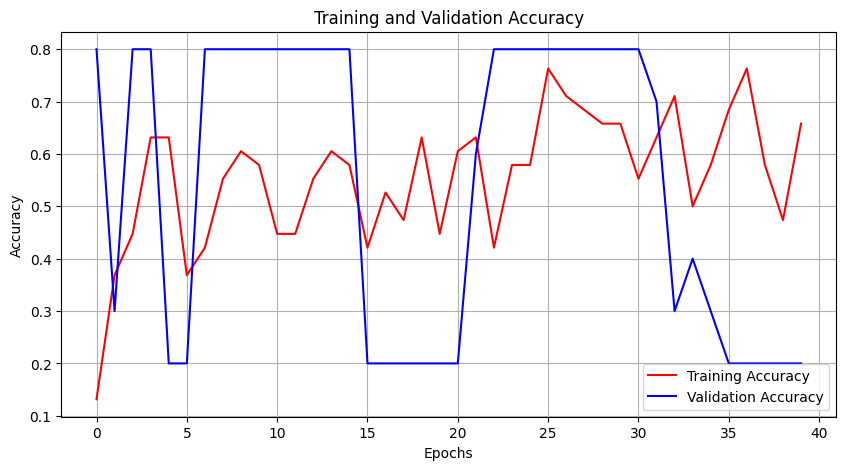

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')  
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')  
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True) 
plt.show()